In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset
Startups=pd.read_csv("C:/Users/Shubham Tiwari/Downloads/50_Startups.csv")
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data=Startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data[data.duplicated()] # No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [6]:
data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


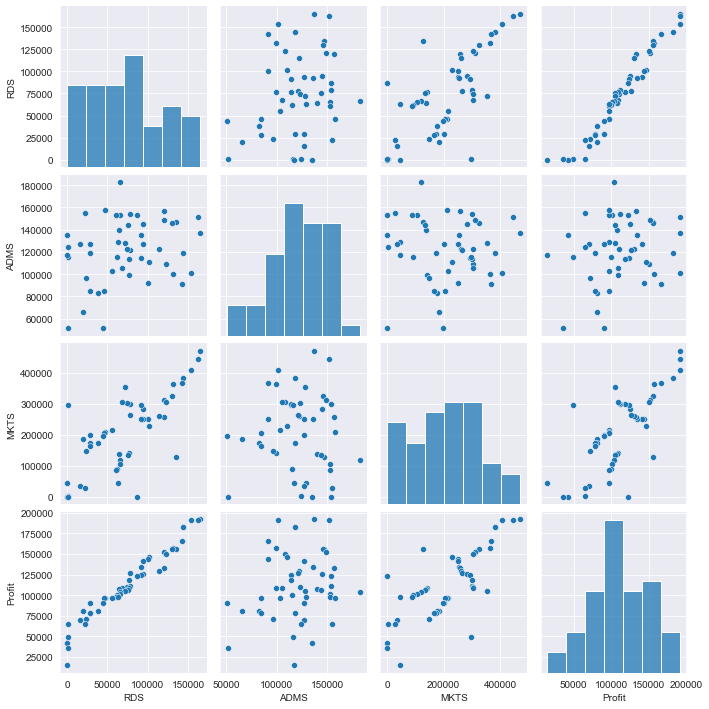

In [8]:
sns.set_style(style='darkgrid');
sns.pairplot(data);

# Model Building

In [9]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()

# Model Testing

In [10]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [11]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [12]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [13]:
# Model accuracy is 94.75%

In [14]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [15]:
slr1=smf.ols("Profit~ADMS",data=data).fit()
slr1.tvalues , slr1.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [16]:
slr2=smf.ols("Profit~MKTS",data=data).fit()
slr2.tvalues , slr2.pvalues  # MKTS has significant pvalu

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [17]:
mlr1=smf.ols("Profit~ADMS+MKTS",data=data).fit()
mlr1.tvalues , mlr1.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation

# Two Techniques: 
1. Collinearity Check &
2. Residual Analysis

In [18]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [19]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

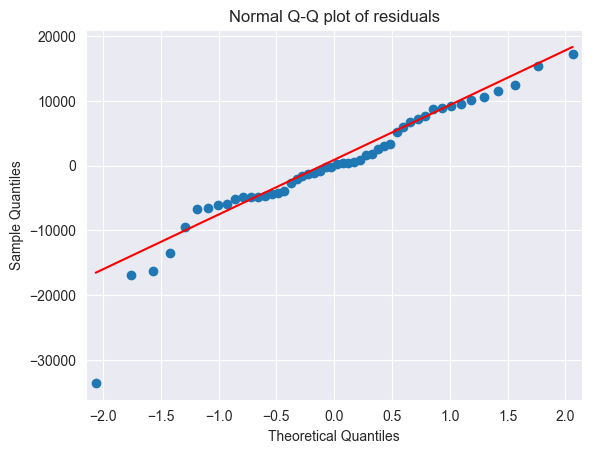

In [20]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [22]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

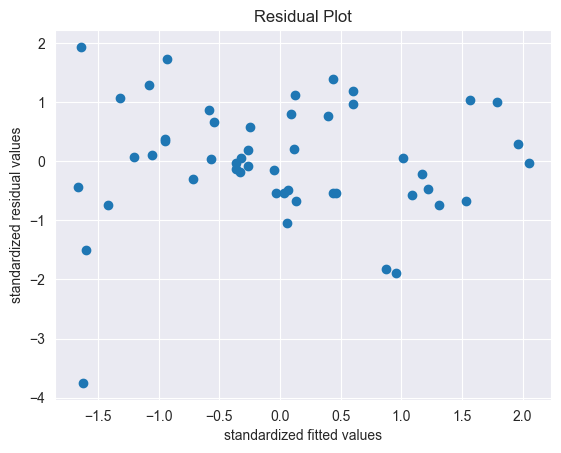

In [23]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [24]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

eval_env: 1


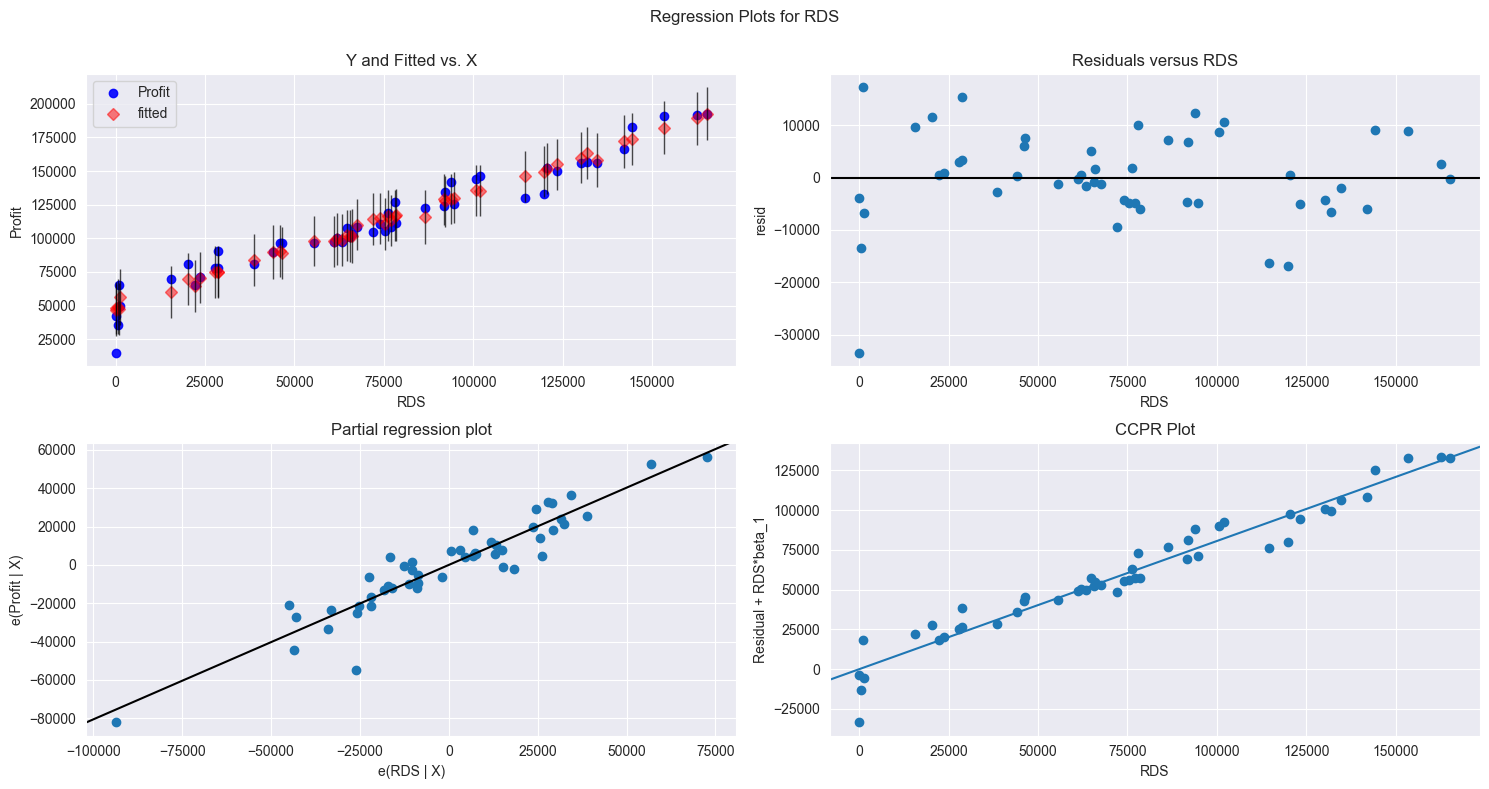

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


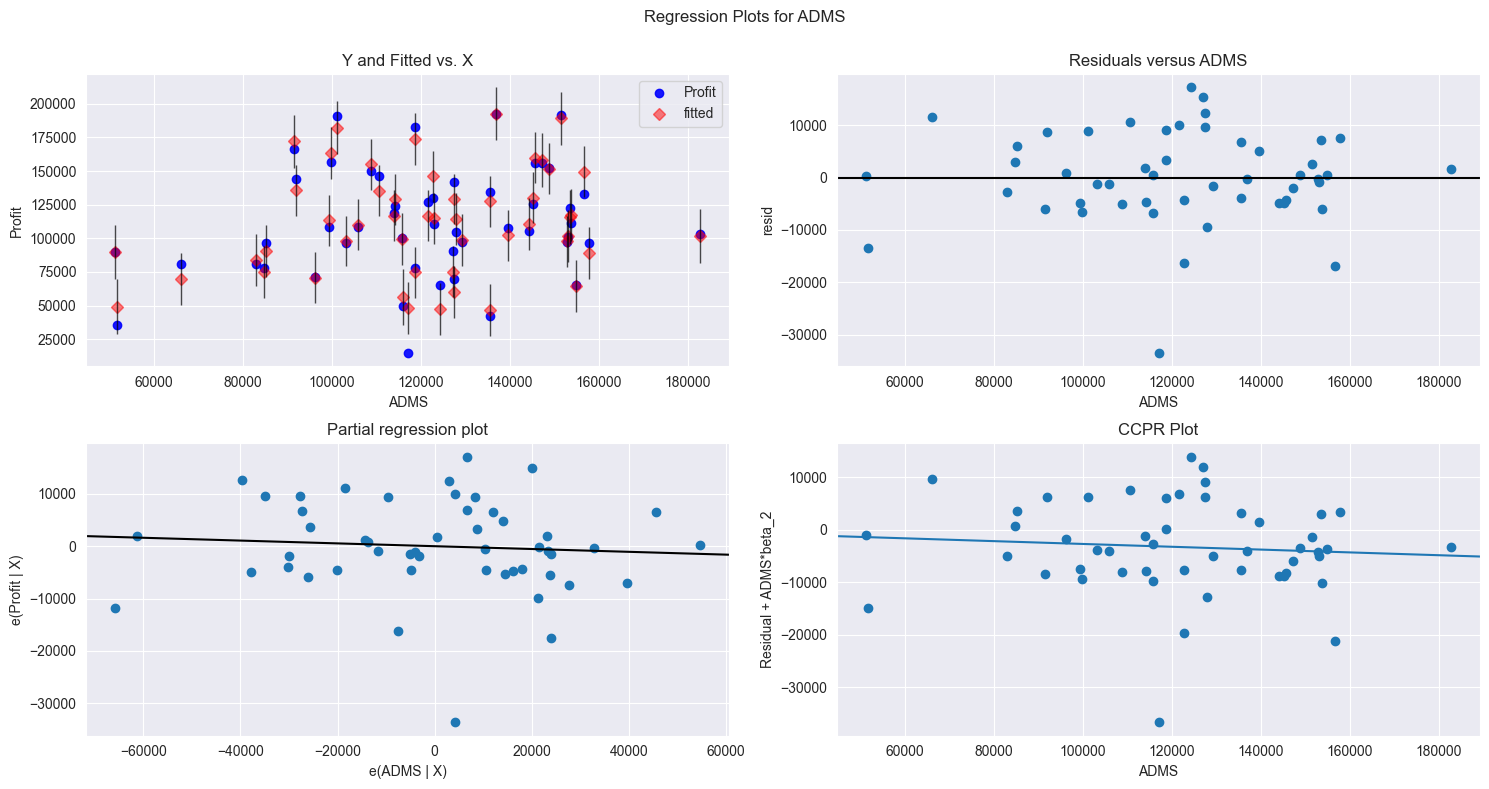

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


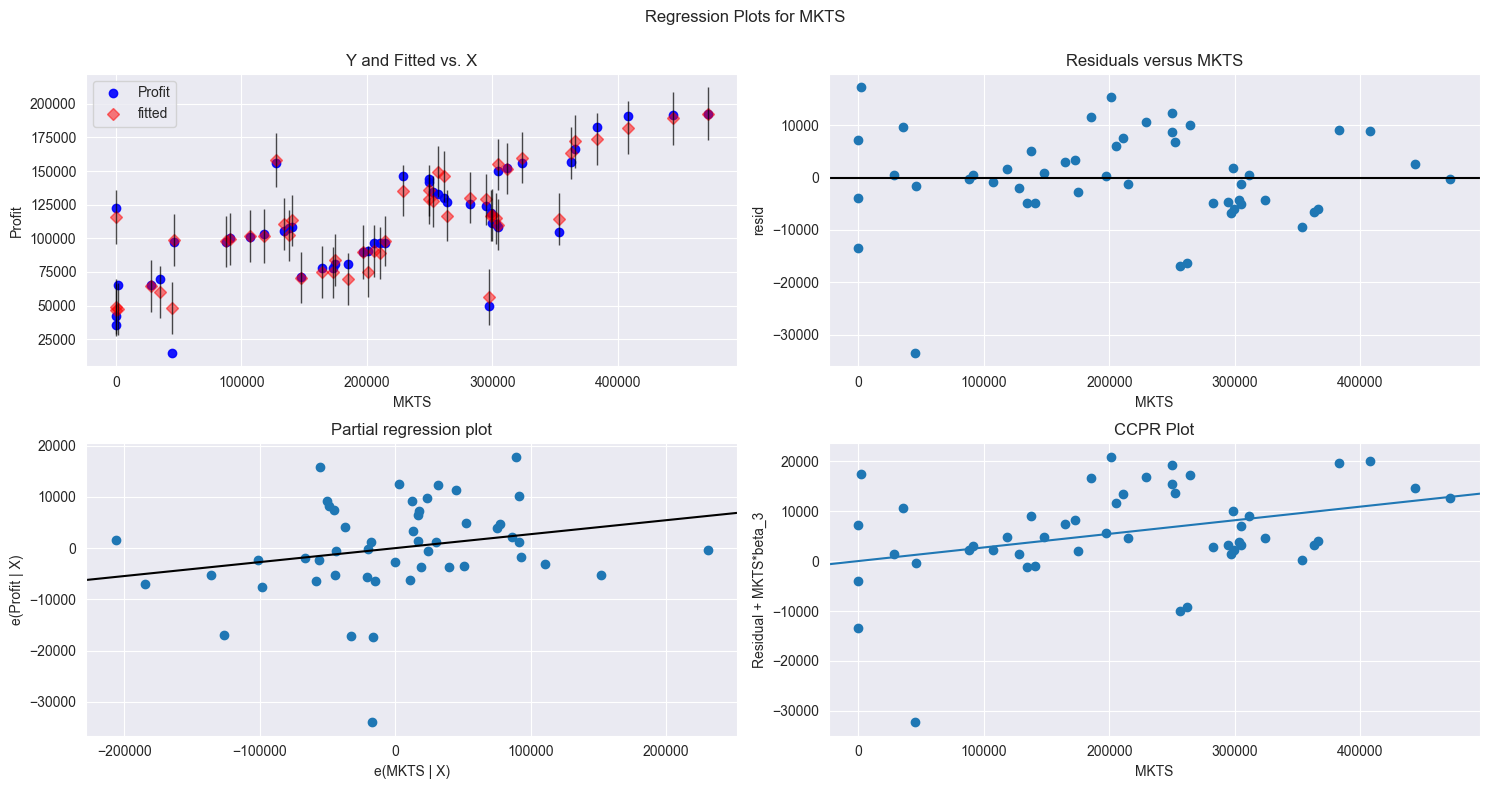

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 
1. Cook's Distance &
2. Leverage value

In [28]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

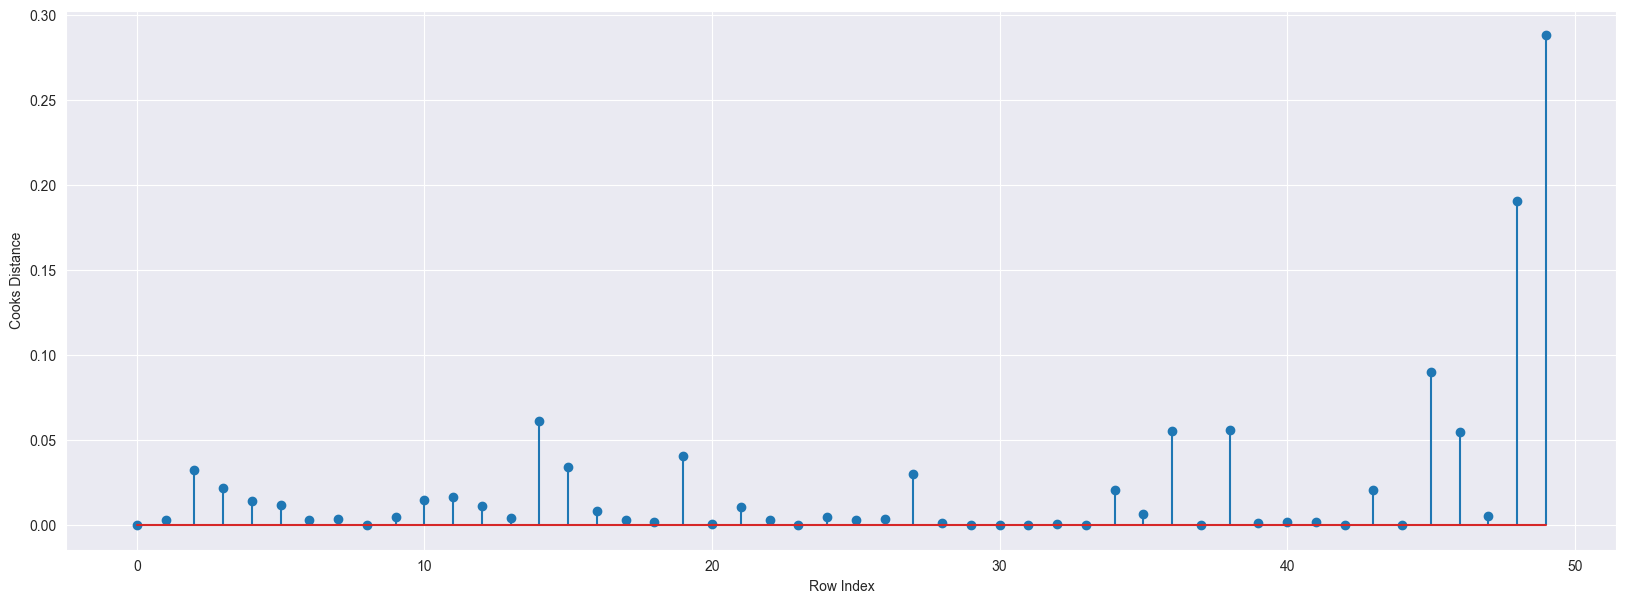

In [29]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432673)

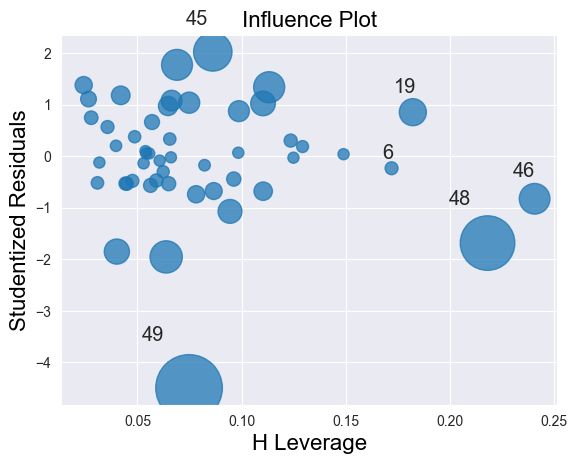

In [31]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [32]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [33]:
data[data.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [34]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Model Deletion Diagnostics and Final Model

In [35]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data1
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [36]:
final_model.rsquared

0.9613162435129847

# Model Predictions

In [37]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [38]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [39]:
# Automatic Prediction of Price with 90.02% accurcy
pred=final_model.predict(data1)
pred.head()

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

# table containing R^2 value for each prepared model

In [40]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame()
table

""


In [41]:
Startups["Predictions"]=pred
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Predictions
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
